# __Welcome to the Store Sales Challenge!__

This notebook provides you some code to setup a Store Data Engineering problem.  

Goal: We want you to predict the number of __sales_per_day__ (= label) with the given dataset and put it into production.


Short explanation of the dataset: 
- __outlet_id__: The ID of a outlet/market
- __country__: The country in which the outlet is located
- __brand__: 
- __customers_per_day__: The number of customers per day in this outlet 
- __sales_per_day__: The amount of sales for a specific outlet on a specific day
- __currency__: The currency of __sales_per_day__
- __week_id__: Calendar week 
- __weekday__: mon = Monday, tue = Tuesday, ... , sun = Sunday

# Load Libraries

In [2]:
# Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Machine Learning
## Feature Scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Diffrent Algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Metrics
from sklearn.metrics import r2_score

## Comparision of Performance of all Algorithms



#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data.csv',sep=';')
data.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61


In [3]:
df = data.copy()

In [4]:
df.head(10)

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,MediaMarkt,spain,EURO,3138.0,100.0,34.0,sat,72169.14
1,Saturn,germany,EURO,378.0,86.0,8.0,mon,52825.62
2,MediaMarkt,italy,EURO,379.0,530.0,28.0,thu,53309.83
3,Saturn,germany,EURO,3050.0,17.0,47.0,sat,74237.45
4,MediaMarkt,spain,EURO,548.0,164.0,7.0,tue,56621.61
5,MediaMarkt,austria,EURO,1424.0,399.0,7.0,fri,59294.79
6,MediaMarkt,italy,EURO,479.0,598.0,46.0,thu,61603.64
7,MediaMarkt,austria,EURO,2028.0,342.0,36.0,sat,-999999.00
8,MediaMarkt,germany,EURO,1425.0,56.0,46.0,fri,62742.69
9,MediaMarkt,switzerland,CHF,266.0,477.0,10.0,mon,51922.36


In [5]:
df.tail()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
18202,MediaMarkt,greece,EURO,0.0,255.0,21.0,sun,0.00
18203,MediaMarkt,germany,EURO,599.0,79.0,28.0,tue,59706.64
18204,MediaMarkt,germany,EURO,230.0,99.0,29.0,mon,54474.81
18205,MediaMarkt,germany,EURO,403.0,99.0,50.0,mon,56045.90
18206,MediaMarkt,austria,EURO,595.0,334.0,45.0,thu,55690.77


# Challenge
Now it is your turn. Show us how you are tackeling this problem. You have complete freedom what you do.

## Exploration
The goal here is to better understand the underlying data e.g. in terms of completeness, distribution etc..

## Data Understanding
shape

Info

describe

unique

## Data Preprocessing & Exploration
Identify Duplicates

Identify & Treat Missing values

Handling Data type

Data Exploration using plots

Observations

Handling Categorical Variables - Label Encoding

Outiers detection & Treatment

Skewness & Kurtosis

## Feature Selection
Correlation matrix

Tree Based methods

VIF

## Model
Linear Regression

Random Forest

Model Optimisation

Prediction



Q & A

Architecture


# Data Understanding

Check the shape

In [6]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset has 18207 rows and 8 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              18174 non-null  object 
 1   country            18185 non-null  object 
 2   currency           18184 non-null  object 
 3   customers_per_day  18199 non-null  float64
 4   outlet_id          18194 non-null  float64
 5   week_id            18194 non-null  float64
 6   weekday            18170 non-null  object 
 7   sales_per_day      18193 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.1+ MB


Data contain 4 float ,4 object values.

All variable contains null values (empty or missing value).

In [9]:
#Describe the Dataset
#Get the total counts, mean, std and other valuable descriptions using describe()

In [8]:
df.describe()

,customers_per_day,outlet_id,week_id,sales_per_day
count,18199.000000,18194.000000,18194.000000,18193.000000
mean,259.351503,-301.265747,-852.575684,50823.378059
std,26758.789881,24590.138649,29643.403749,31283.133925
min,-999999.000000,-999999.000000,-999999.000000,-999999.000000
25%,327.000000,97.000000,14.000000,51260.450000
50%,550.000000,255.000000,27.000000,57319.920000
75%,1605.000000,530.000000,40.000000,63163.580000
max,4734.000000,698.000000,52.000000,96225.530000


In [10]:
#check the each variable uniqueness

df.nunique()

brand                    2
country                  7
currency                 2
customers_per_day     2978
outlet_id               51
week_id                 53
weekday                  7
sales_per_day        15544
dtype: int64

import and analyse dataset with automatic EDA library - sweetviz

In [57]:
import sweetviz as sv

In [44]:
#analyzing the dataset
sales_report = sv.analyze(df)
#display the report
sales_report.show_html('Sales.html')


Report Sales.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Preprocessing

In [96]:
df.duplicated().sum() #finds duplicate rows

0

In [ ]:
#Handling -999999.0 value in columns

In [11]:
df['customers_per_day'] = df['customers_per_day'].replace([-999999.0],0)
df['outlet_id'] = df['outlet_id'].replace([-999999.0],0)
df['week_id'] = df['week_id'].replace([-999999.0],0)
df['sales_per_day'] = df['sales_per_day'].replace([-999999.0],0)

Check the Rows with Null Values

First process: total number of null values in all valriables

Second process: plotting bar chart

Third process : finding %ge of null values in each variable

In [17]:
missing = df.isnull().sum()
missing

brand                33
country              22
currency             23
customers_per_day     8
outlet_id            13
week_id              13
weekday              37
sales_per_day        14
dtype: int64

<AxesSubplot:>

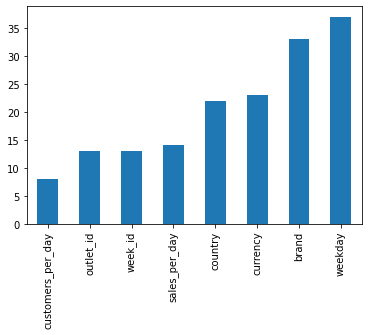

In [18]:
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [19]:
# percentage of missing value

df.isnull().sum() / df.shape[0] * 100

brand                0.181249
country              0.120833
currency             0.126325
customers_per_day    0.043939
outlet_id            0.071401
week_id              0.071401
weekday              0.203219
sales_per_day        0.076894
dtype: float64

In [ ]:
Observations:

Missing values are present in all columns

Missing values are not more than 0.20%

Maximum number of missing values are in weekday & brand column 0.2% and 0.18% resp.


# Missing Value Treatment

As this is physical store so checking if is there any customer visit or sales happen on Sunday

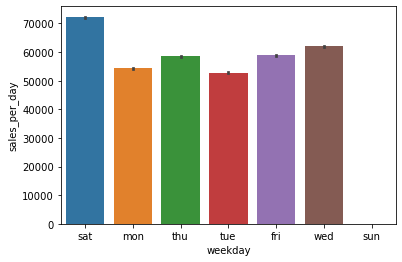

In [8]:
sns.barplot(x = 'weekday',y = 'sales_per_day',data = df)
plt.show()

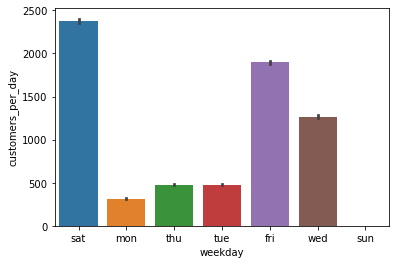

In [9]:
sns.barplot(x = 'weekday',y = 'customers_per_day',data = df)
plt.show()

In [166]:
#Dropping all rows where Weekday is sunday

In [20]:
df = df[df.weekday != "sun"].copy()

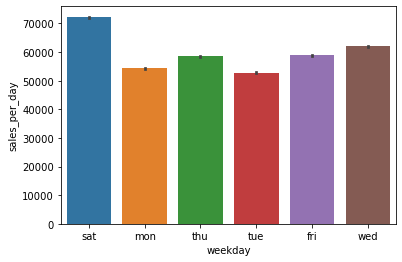

In [21]:
sns.barplot(x = 'weekday',y = 'sales_per_day',data = df)
plt.show()

In [22]:
df['customers_per_day'].min()

0.0

In [ ]:
checking if the customer visit per day and sales per day are both 0 on same day or not

In [24]:
df[df.customers_per_day == 0.0]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
222,MediaMarkt,austria,EURO,0.0,342.0,19.0,sat,66916.21
1241,MediaMarkt,germany,EURO,0.0,52.0,26.0,NaN,0.00
1388,MediaMarkt,austria,EURO,0.0,363.0,20.0,NaN,0.00
2578,MediaMarkt,italy,EURO,0.0,598.0,19.0,wed,64171.50
2729,MediaMarkt,austria,EURO,0.0,339.0,9.0,NaN,0.00
2952,MediaMarkt,switzerland,CHF,0.0,408.0,17.0,mon,48937.41
3168,MediaMarkt,netherlands,EURO,0.0,652.0,11.0,mon,50925.90
5457,MediaMarkt,italy,EURO,0.0,509.0,4.0,mon,58329.07
6260,Saturn,spain,EURO,0.0,108.0,18.0,wed,67809.39
6638,MediaMarkt,italy,EURO,0.0,509.0,47.0,thu,59056.14


In [27]:
df.shape

(15613, 8)

In [28]:
#Missing value imputation using mean for continuous and interger variables
df['customers_per_day'] = df['customers_per_day'].fillna(df['customers_per_day'].mean())

In [30]:
#Replacing discrete and categorical variables using mode

mode0 = df['country'].mode().values[0]
df['country'] = df['country'].replace(np.nan, mode0)

mode1 = df['outlet_id'].mode().values[0]
df['outlet_id'] = df['outlet_id'].replace(np.nan, mode1)

mode2 = df['week_id'].mode().values[0]
df['week_id'] = df['week_id'].replace(np.nan, mode2)

mode3 = df['currency'].mode().values[0]
df['currency'] = df['currency'].replace(np.nan, mode3)

mode4= df['brand'].mode().values[0]
df['brand'] = df['brand'].replace(np.nan, mode4)

mode5 = df['weekday'].mode().values[0]
df['weekday'] = df['weekday'].replace(np.nan, mode5)

Handling the missing values in the sales_per_day column. 
Since, our target column is sales_per_day Column, if we impute the values to this column it’ll affect our analysis.
So, it is better to drop the missing values from sales_per_day Column

In [31]:
#drop the records with sales_per_day missing in data.
df = df[~df.sales_per_day.isnull()].copy()

In [32]:
# Calculate the missing values in each column of data frame
df.isnull().sum()

brand                0
country              0
currency             0
customers_per_day    0
outlet_id            0
week_id              0
weekday              0
sales_per_day        0
dtype: int64

# Handling Data Type

In [39]:
#Incorrect Data Type conversion
df= df.astype({"customers_per_day":'int',"outlet_id":'object',"week_id":'object'})
#displaying the data
df.dtypes

brand                 object
country               object
currency              object
customers_per_day      int32
outlet_id             object
week_id               object
weekday               object
sales_per_day        float64
dtype: object

Converted variables customer_per_day from float to integer
And week_id and outlet_id are categorical variable so converted into object

In [41]:
df.describe()

,customers_per_day,sales_per_day
count,15603.000000,15603.000000
mean,1135.276165,59772.461003
std,858.104962,8205.815380
min,0.000000,0.000000
25%,400.000000,54175.265000
50%,819.000000,58753.030000
75%,1753.000000,64383.720000
max,4734.000000,96225.530000


## Data Exploration using Plots with Observations

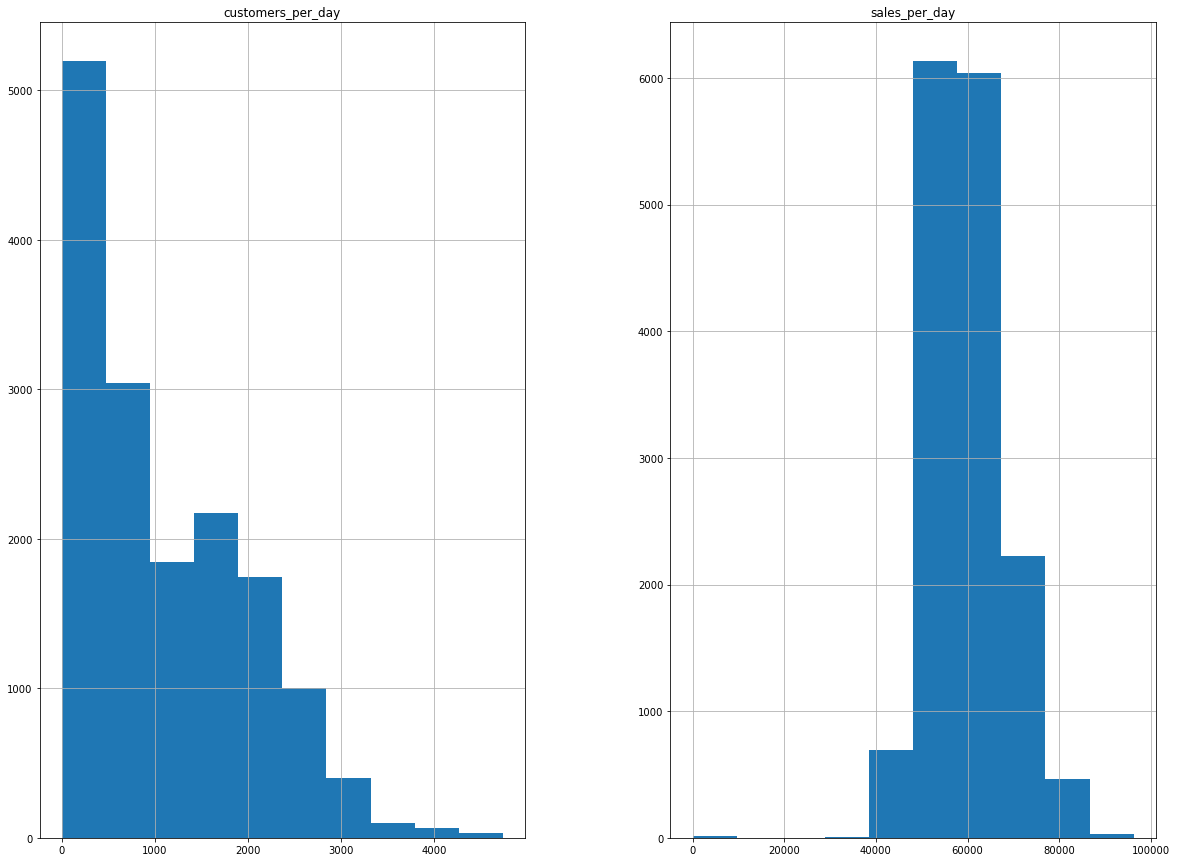

In [42]:
#plotting all variables
df.hist(figsize = (20,15))
plt.show()

Observations:

Average maximum customers per day are in the range of 0 to 500. Data is skewed towards left.
Average maximum sales per day is within the range of 4500 to 6500, Data is normally distributed


<AxesSubplot:xlabel='currency', ylabel='sales_per_day'>

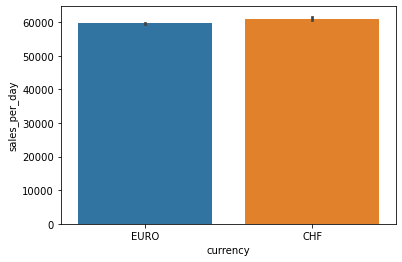

In [43]:
sns.barplot(x="currency",y="sales_per_day",data=df)

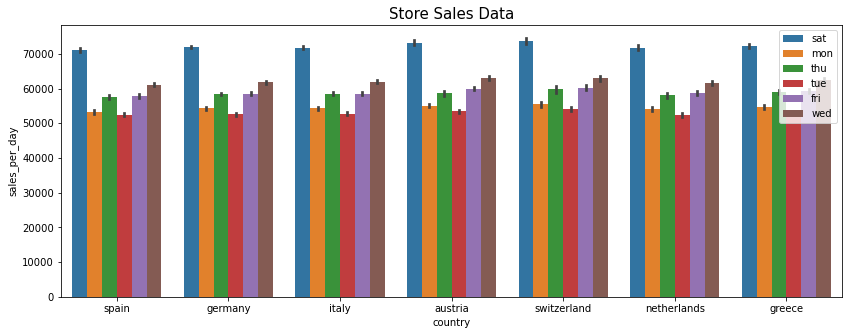

In [44]:
fig, ax = plt.subplots(figsize=(14,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="country", y="sales_per_day",hue = 'weekday',data=df)
a.set_title("Store Sales Data",fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [ ]:
Observations:
1) Sales throughout the countries are uniform

2)Maximum sales happend on Saturday

3) Min sales happened on Tuesdays

Solution:
    
Throughout all the outlets, on Tuesdays stores can provide some attractive offers to customers

In [22]:
df.columns

Index(['brand', 'country', 'currency', 'customers_per_day', 'outlet_id',
       'week_id', 'weekday', 'sales_per_day'],
      dtype='object')

<AxesSubplot:xlabel='country', ylabel='sales_per_day'>

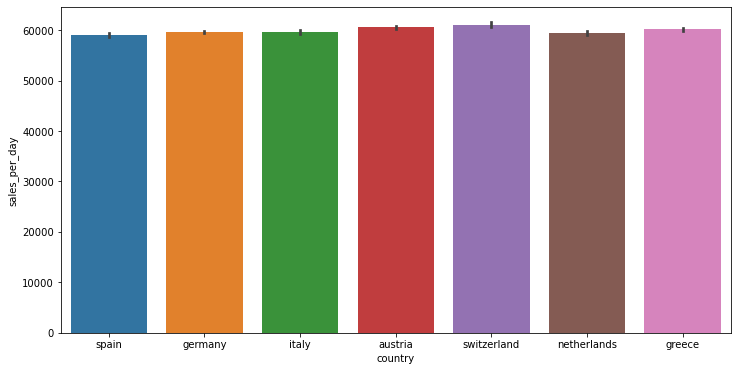

In [45]:
#plt.rcParams['figure.figsize'] = (12, 6)
#sns.barplot(x="country",y="sales_per_day",data=df)

What Country had the highest number of sales?

In [46]:
country_df = df.groupby('country').sum()
country_df

,customers_per_day,sales_per_day
country,,
austria,2445485,1.295447e+08
germany,4900463,2.562041e+08
greece,2083216,1.101990e+08
italy,2757708,1.455911e+08
netherlands,2067454,1.088689e+08
spain,2420461,1.261726e+08
switzerland,1038927,5.604940e+07


In [52]:
country_df = country_df.sort_values('sales_per_day', ascending = False)
country_df.head()

,customers_per_day,sales_per_day
country,,
germany,4900463,2.562041e+08
italy,2757708,1.455911e+08
austria,2445485,1.295447e+08
spain,2420461,1.261726e+08
greece,2083216,1.101990e+08


Observation: Germany had the highest numbers of sales 

The second number of sales was in Italy

Minimum sales is in Greece

<AxesSubplot:xlabel='country', ylabel='sales_per_day'>

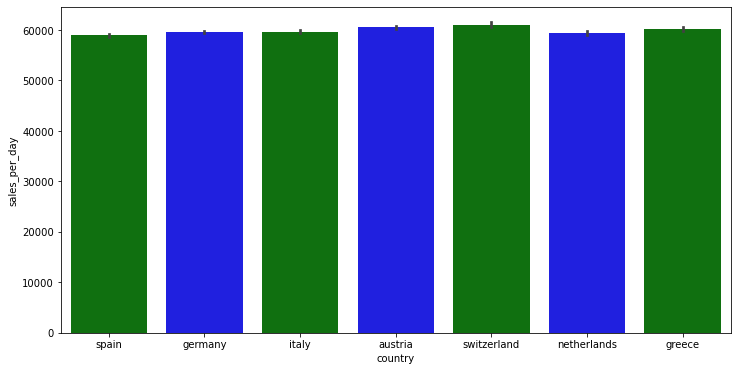

In [60]:
sns.barplot(x="country",y="sales_per_day",data=df,palette=['green','blue'])

In [ ]:
Which outlet has maximum  sales?

In [53]:
outlet_df = df.groupby('outlet_id').sum()
outlet_df

,customers_per_day,sales_per_day
outlet_id,,
0,9597,653518.89
14,354594,18342069.94
17,344238,18207785.67
51,350335,18246221.50
52,342984,18403331.76
56,342937,18066711.53
59,345286,18335952.64
70,345178,18025947.12
74,347277,18144852.75


In [55]:
outlet_df = outlet_df.sort_values('sales_per_day', ascending = False)
outlet_df.head()

,customers_per_day,sales_per_day
outlet_id,,
598,711326,36924447.55
477,345735,18797331.72
421,343916,18708983.59
339,352665,18691716.30
301,341950,18563205.55


Observation: 
Outliet_id 598 has overall maximum sales as well as customers

In [ ]:
 What was the best month for sales in 2018? How much was earned that month?

In [58]:
results = df.groupby('week_id').sum()
results= results.sort_values('sales_per_day', ascending = False)

results

,customers_per_day,sales_per_day
week_id,,
49,491950,19629967.47
47,489309,19493186.31
51,495007,19459536.17
52,489078,19438473.09
48,483259,19411073.01
50,481253,19327860.40
46,330318,18667208.69
37,330571,18549681.15
43,340671,18517472.74


<AxesSubplot:xlabel='week_id', ylabel='sales_per_day'>

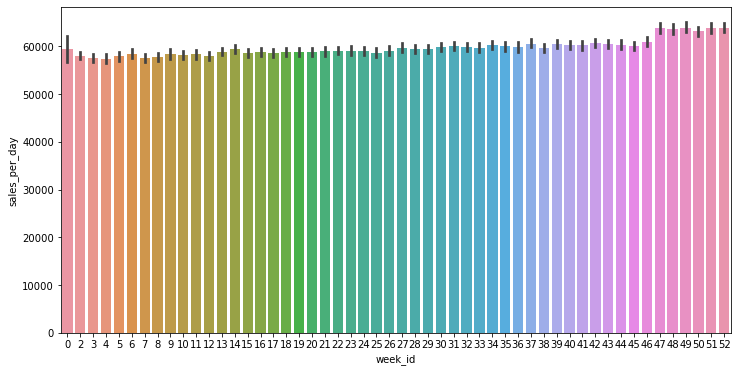

In [112]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="week_id",y="sales_per_day",data=df)

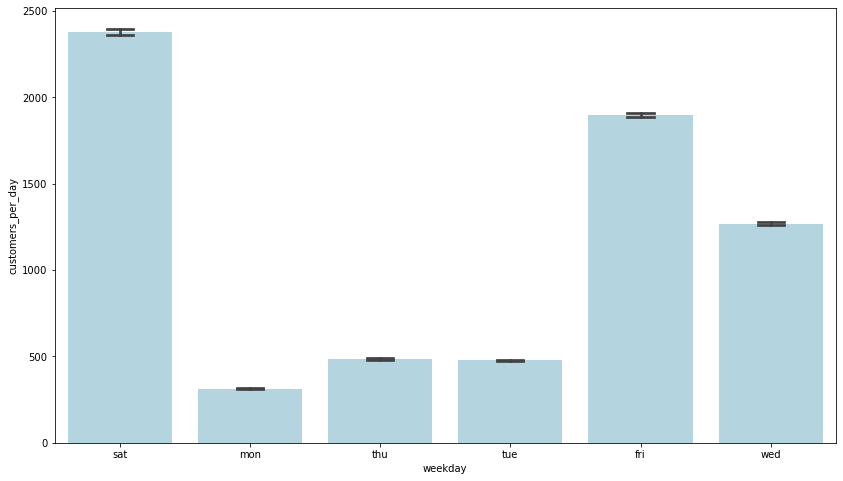

In [113]:
# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="weekday", y="customers_per_day", data=df, estimator=np.mean, ci=85, capsize=.2, color='lightblue')

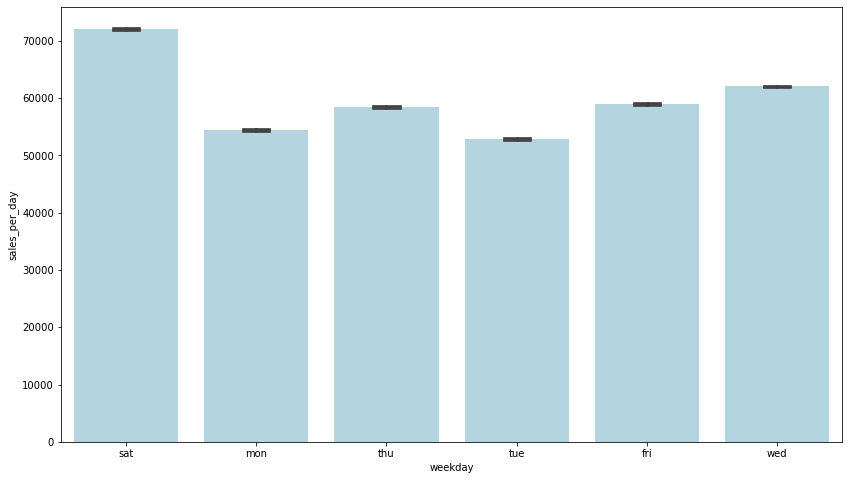

In [114]:
# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="weekday", y="sales_per_day", data=df, estimator=np.mean, ci=85, capsize=.2, color='lightblue')

In [23]:
df.nunique()

brand                    2
country                  7
currency                 2
customers_per_day     2977
outlet_id               51
week_id                 52
weekday                  6
sales_per_day        15543
dtype: int64

<AxesSubplot:xlabel='country', ylabel='sales_per_day'>

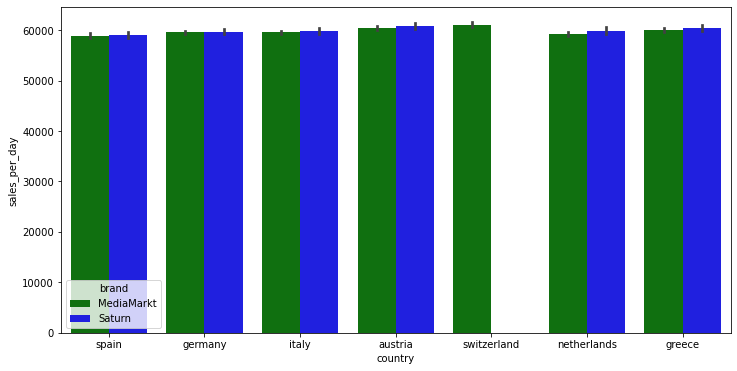

In [62]:
sns.barplot(x="country",y="sales_per_day",hue = "brand",data=df,palette=['green','blue'])

Observation:
1) All countries has uniform sales

2) Switzerland do not has Saturn outlet


## Currency is used by which country?

In [63]:
df[['country','currency']].groupby(['country','currency']).size().reset_index()

,country,currency,0
0,austria,EURO,2140
1,germany,CHF,1
2,germany,EURO,4298
3,greece,EURO,1833
4,italy,EURO,2442
5,netherlands,EURO,1831
6,spain,EURO,2140
7,switzerland,CHF,915
8,switzerland,EURO,3


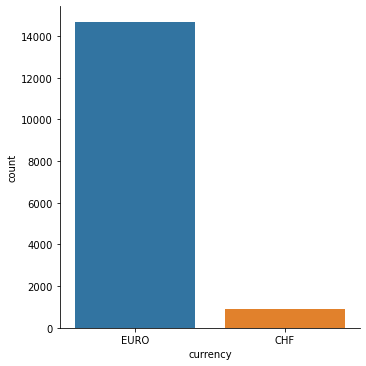

In [32]:
sns.factorplot('currency',data=df,kind='count')

In [33]:
df.currency.value_counts(normalize=True)

EURO    0.941293
CHF     0.058707
Name: currency, dtype: float64

This shows 94%  currency is Euros and aprox 6% is CHF

## Pie Chart- Top 3 countries where sales are high

In [34]:
country_names=df.country.value_counts().index

In [35]:
country_val=df.country.value_counts().values

([<matplotlib.patches.Wedge at 0x134fce7b1f0>,
 [Text(0.0550371185604649, 1.0986222806681838, 'germany'),
  Text(-0.7944863363753157, -0.7607834523127648, 'italy'),
  Text(0.7995817536951726, -0.7554263823548609, 'spain')],
 [Text(0.030020246487526304, 0.5992485167281002, '48.41%'),
  Text(-0.4333561834774449, -0.4149727921705989, '27.50%'),
  Text(0.4361355020155486, -0.4120507540117423, '24.10%')])

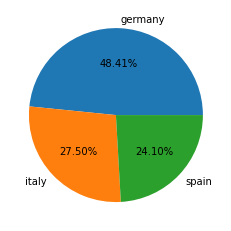

In [36]:

plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation:MMS maximum records or transaction are from Germany After that Italy and then Austria

In [26]:
df[df.sales_per_day == 0.0]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
7,MediaMarkt,austria,EURO,2028.0,342.0,36.0,sat,0.0
1241,MediaMarkt,germany,EURO,0.0,52.0,26.0,NaN,0.0
1388,MediaMarkt,austria,EURO,0.0,363.0,20.0,NaN,0.0
2009,Saturn,spain,EURO,420.0,187.0,23.0,mon,0.0
2671,MediaMarkt,netherlands,EURO,429.0,645.0,35.0,tue,0.0
2729,MediaMarkt,austria,EURO,0.0,339.0,9.0,NaN,0.0
4269,MediaMarkt,germany,EURO,1250.0,56.0,41.0,wed,0.0
8173,Saturn,spain,EURO,0.0,187.0,4.0,NaN,0.0
10502,Saturn,germany,EURO,1996.0,51.0,33.0,fri,0.0
13006,Saturn,netherlands,EURO,324.0,601.0,36.0,thu,0.0


#plot the pair plot of sales_per_day, customers_per_day, outlet_id in data dataframe.

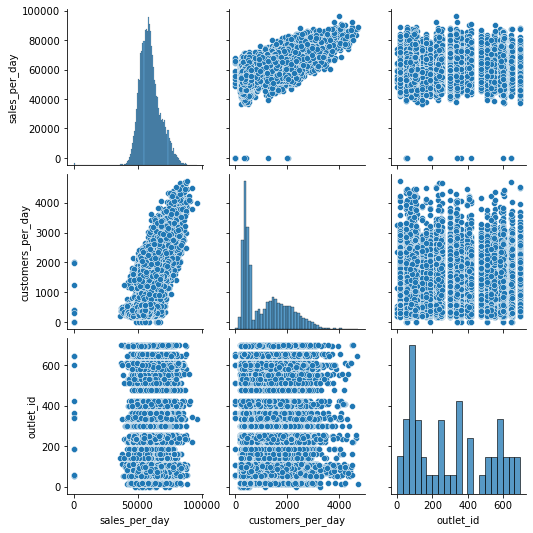

In [65]:

sns.pairplot(data = df, vars=['sales_per_day','customers_per_day','outlet_id'])
plt.show()

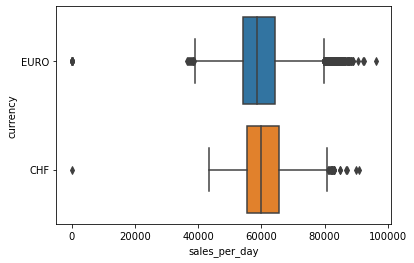

In [37]:
#plot the box plot of sales_per_day for currency.
sns.boxplot(df.sales_per_day, df.currency)
plt.show()

<AxesSubplot:xlabel='customers_per_day', ylabel='sales_per_day'>

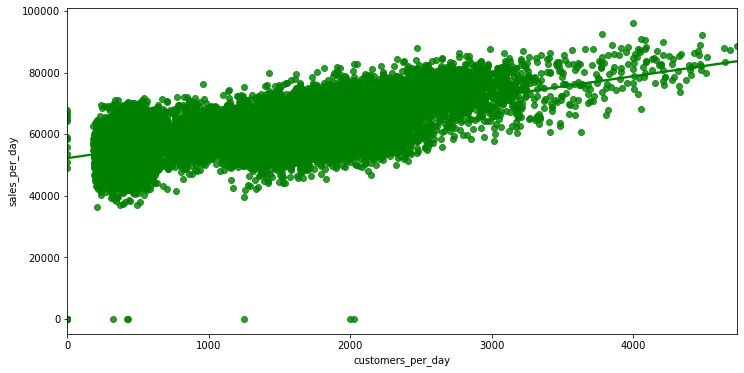

In [69]:
sns.regplot(x=df.customers_per_day, y=df.sales_per_day, color='g')

# Handling Categorical Variables

In [76]:
df.columns

Index(['brand', 'country', 'currency', 'customers_per_day', 'outlet_id',
       'week_id', 'weekday', 'sales_per_day'],
      dtype='object')

In [78]:
#CONVERT CATEGORICAL TO NUMERICAL
def Encoder(df):
    columnsToEncode = list(df.drop(['customers_per_day','sales_per_day'],axis =1).select_dtypes(include=['category','object','boolean']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df
df = Encoder(df)

df.dtypes

brand                  int32
country                int32
currency               int32
customers_per_day      int32
outlet_id              int32
week_id                int32
weekday                int32
sales_per_day        float64
dtype: object

# Checking Skewness & Kurtosis

In [80]:
#statistics
df.skew()

brand                0.905857
country              0.339066
currency            -3.754853
customers_per_day    0.894750
outlet_id           -0.036243
week_id              0.001135
weekday             -0.002519
sales_per_day        0.256130
dtype: float64

Currency is negatively skewed indicates the tail is on the left side of the distribution

In [81]:
df.kurtosis()

brand                -1.179575
country              -1.113492
currency             12.100473
customers_per_day     0.037380
outlet_id            -1.227282
week_id              -1.201337
weekday              -1.265711
sales_per_day         2.347060
dtype: float64

As the distribution in Currency has a kurtosis greater than 3, it has leptokurtic issue, which means it tends to produce more outliers than the normal distribution.

# Outliers Detection

In [82]:
#sns.boxplot(df)

brand                   AxesSubplot(0.125,0.816017;0.133621x0.0639831)
country              AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
currency              AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
customers_per_day    AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
outlet_id            AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
week_id                 AxesSubplot(0.125,0.739237;0.133621x0.0639831)
weekday              AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
sales_per_day         AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
dtype: object

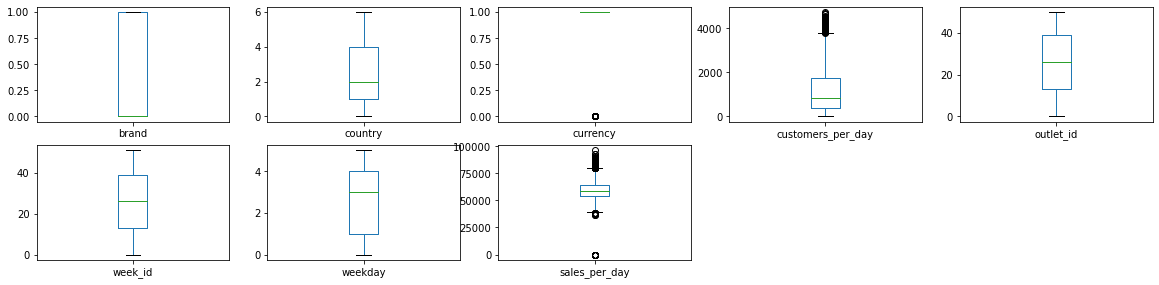

In [83]:
df.select_dtypes(include=['integer','float']).plot(kind="box",subplots=True,layout = (10,5),figsize=(20,25))

In [109]:
# IQR
Q1 = np.percentile(df['sales_per_day'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['sales_per_day'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [50]:
Q1 = np.percentile(df['sales_per_day'], 25)
Q3 = np.percentile(df['sales_per_day'], 75)
IQR = Q3 - Q1

Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

df[df['sales_per_day']>Upper_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
10,1,4,1,3143,601,49,2,81088.06
17,1,0,1,2759,333,12,2,81221.75
124,0,6,0,3266,477,47,2,84944.66
179,0,4,1,2948,608,37,2,80586.36
240,1,3,1,2937,588,25,2,81553.49
...,...,...,...,...,...,...,...,...
17971,0,2,1,4485,222,47,2,92180.92
17980,0,0,1,2883,342,44,2,82032.98
18054,1,1,1,3104,51,24,2,83210.88
18094,0,4,1,3092,608,30,2,81343.61


In [52]:
df[df['sales_per_day']<Lower_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
7,0,0,1,2028,342,36,2,0.00
1241,0,1,1,0,52,26,3,0.00
1388,0,0,1,0,363,20,3,0.00
2009,1,5,1,420,187,23,1,0.00
2323,0,5,1,493,142,7,4,36881.67
2671,0,4,1,429,645,35,4,0.00
2729,0,0,1,0,339,9,3,0.00
3938,0,4,1,374,608,4,4,37173.73
4269,0,1,1,1250,56,41,5,0.00
5062,0,5,1,512,164,23,4,37843.69


In [55]:
# IQR
Q1 = np.percentile(df['customers_per_day'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['customers_per_day'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


Q1 = np.percentile(df['customers_per_day'], 25)
Q3 = np.percentile(df['customers_per_day'], 75)
IQR = Q3 - Q1

Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

df[df['customers_per_day']>Upper_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
797,0,5,1,4007,164,47,2,82942.35
832,0,6,0,3797,477,49,2,83074.11
869,0,4,1,4208,608,47,2,85635.36
870,0,6,0,4166,477,50,2,86891.02
1192,0,2,1,4089,234,49,2,88442.20
...,...,...,...,...,...,...,...,...
16887,0,1,1,3806,79,52,2,74973.00
17379,1,5,1,4471,108,52,2,82694.21
17518,0,3,1,4086,555,48,2,90479.53
17920,1,4,1,4518,698,47,2,79971.59


In [56]:
df[df['customers_per_day']<Lower_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day


In [57]:
# IQR
Q1 = np.percentile(df['currency'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['currency'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


Q1 = np.percentile(df['currency'], 25)
Q3 = np.percentile(df['currency'], 75)
IQR = Q3 - Q1

Lower_tail = Q1 - 1.5 * IQR
Upper_tail = Q3 + 1.5 * IQR

df[df['currency']>Upper_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day


In [58]:
df[df['currency']<Lower_tail]

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
9,0,6,0,266,477,10,1,51922.36
73,0,6,0,2237,408,38,0,64555.76
124,0,6,0,3266,477,47,2,84944.66
125,0,6,0,2700,408,48,0,71086.94
158,0,6,0,1715,408,17,2,67137.58
...,...,...,...,...,...,...,...,...
18087,0,6,0,498,421,48,3,66234.75
18151,0,6,0,2258,421,19,0,57817.44
18159,0,6,0,795,477,16,5,60481.97
18173,0,6,0,364,477,21,4,51710.10


In [59]:
df.head(5)

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,0,5,1,3138,100,34,2,72169.14
1,1,1,1,378,86,8,1,52825.62
2,0,3,1,379,530,28,3,53309.83
3,1,1,1,3050,17,47,2,74237.45
4,0,5,1,548,164,7,4,56621.61


# Outlier Treatment

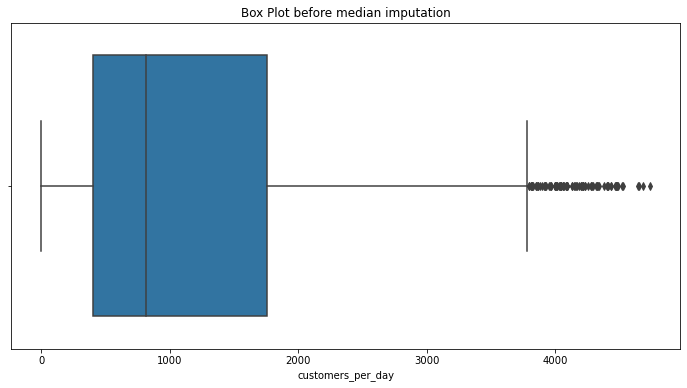

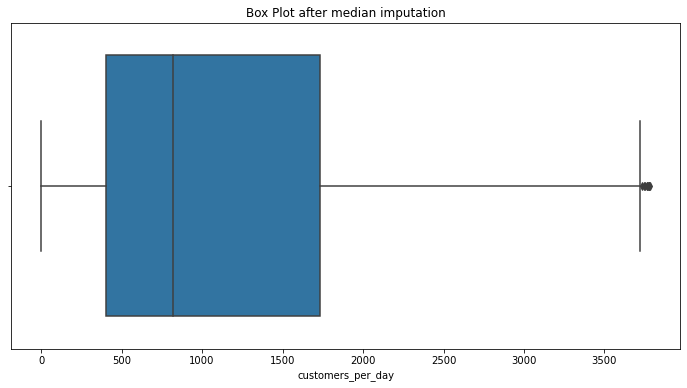

In [124]:
sns.boxplot(df['customers_per_day'])
plt.title("Box Plot before median imputation")
plt.show()
q1 = df['customers_per_day'].quantile(0.25)
q3 = df['customers_per_day'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(df['customers_per_day'])
for i in df['customers_per_day']:
    if i > Upper_tail or i < Lower_tail:
            df['customers_per_day'] = df['customers_per_day'].replace(i, med)
sns.boxplot(df['customers_per_day'])
plt.title("Box Plot after median imputation")
plt.show()

In [59]:
df.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
0,0,5,1,3138,100,34,2,72169.14
1,1,1,1,378,86,8,1,52825.62
2,0,3,1,379,530,28,3,53309.83
3,1,1,1,3050,17,47,2,74237.45
4,0,5,1,548,164,7,4,56621.61


In [ ]:
df['customers_per_day'] = np.log(df['customers_per_day'])

df.hist('customers_per_day',figsize=(8,5))

plt.xlabel("log(customers_per_day)")

<AxesSubplot:xlabel='sales_per_day'>

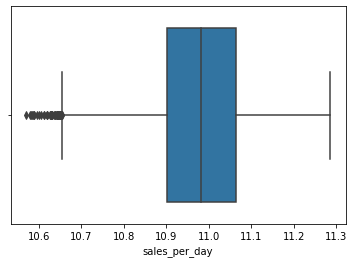

In [70]:
sns.boxplot(df['sales_per_day'])

# Feature Selection

<AxesSubplot:>

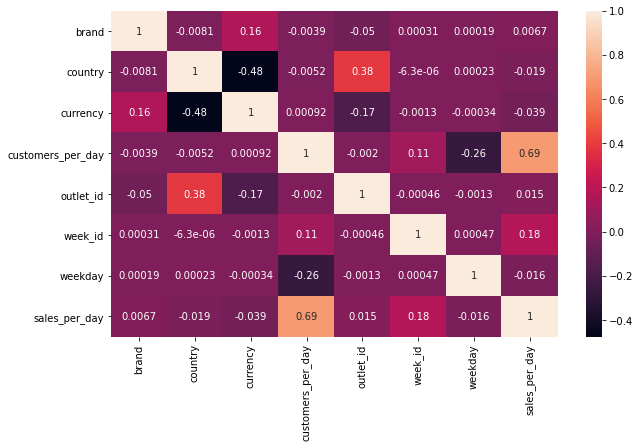

In [84]:
#correlation matrix
cor=df.corr()

#Plotting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot = True)

Observation:
Say 0.5 as the threshold for selecting the variables, here we find that customers_per_day is correlated with target variable sales_per_day.
Country and Currency are negatively correlated to each other


In [2]:
# TODO ... Python coding ... 

In [ ]:
#model_1 using LinearRegression

In [85]:
#DEFINE X AND Y
X=df.drop(['sales_per_day'],axis=1)
y=df['sales_per_day']

#Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)


In [95]:
X_train.head()

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday
15648,0,1,1,334,6,20,3
8236,1,5,1,345,21,35,4
3444,1,1,1,2319,11,46,0
15992,0,5,1,341,19,24,3
2400,0,3,1,587,44,2,4


In [92]:
X_train.shape

(12482, 7)

In [93]:
X_test.shape

(3121, 7)

In [94]:
y_train.shape

(12482,)

In [87]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
reg_lin.score(X_train,y_train)
y_preds_lin=reg_lin.predict(X_test)

In [96]:
features = ['brand', 'country', 'currency','customers_per_day', 'outlet_id',
       'week_id', 'weekday']

In [97]:
coef = pd.Series(reg_lin.coef_,features).sort_values()
coef

currency            -2169.641538
country              -243.911454
customers_per_day       6.939076
outlet_id              14.203267
week_id                55.696273
brand                 416.423743
weekday               844.988646
dtype: float64

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0              brand  1.465158
1            country  3.236309
2           currency  7.319249
3  customers_per_day  0.136032
4          outlet_id  4.695677
5            week_id  3.902613
6            weekday  3.098637


In [99]:
reg_lin.score(X_train,y_train)

0.5213576276174013

<AxesSubplot:>

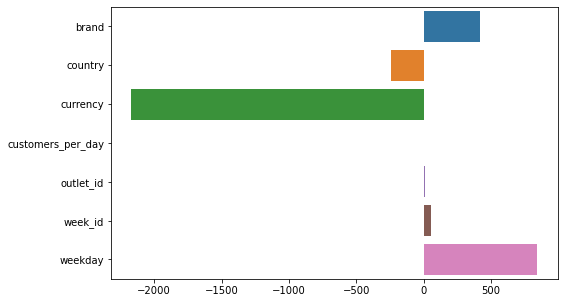

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(reg_lin.coef_,features)

# Model Evaluation

In [102]:
R2 = r2_score(y_test,y_preds_lin)
R2

0.5422450376448769

MAE and MSE:

MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. 
    
MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [103]:
MAE= metrics.mean_absolute_error(y_test,y_preds_lin)
MSE= metrics.mean_squared_error(y_test,y_preds_lin)

print("mean absolute error:",MAE)
print("mean squared error:",MSE)


mean absolute error: 4364.202010224823
mean squared error: 31113321.34065333


RMSE:
    
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [104]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)


Root Mean Squared Error: 5577.931636427013


In [105]:
predictions = reg_lin.predict(X_test)
print("Predicted Sales_per_day for new costumers:", predictions)

Predicted Sales_per_day for new costumers: [52904.53984767 55659.93632783 71374.60570849 ... 55059.78909283
 60827.13689705 68167.82438009]


# Random Forest Regressor

In [107]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [109]:
coef1 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef1

customers_per_day    0.628814
weekday              0.353043
week_id              0.017491
outlet_id            0.000556
country              0.000090
brand                0.000006
currency             0.000000
dtype: float64

<AxesSubplot:>

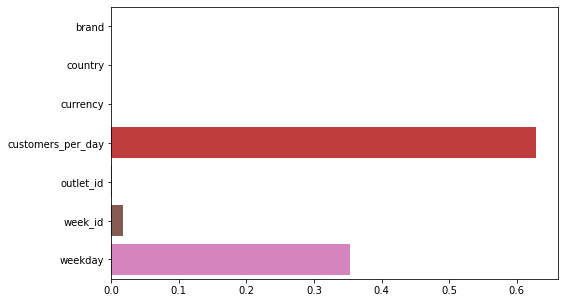

In [110]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [111]:
R2 = r2_score(y_test,y_pred)
R2

0.6677772554045964

# Model optimisation using Randomized Search CV

In [72]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [74]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [76]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =1)

In [77]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  16.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [80]:
rf_random.best_score_

-22630445.780923616

In [81]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='sales_per_day', ylabel='Density'>

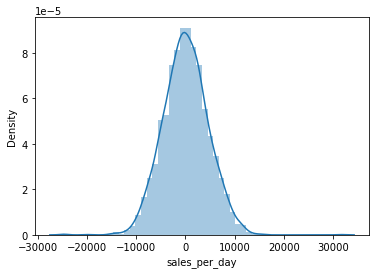

In [82]:
sns.distplot(y_test-predictions)

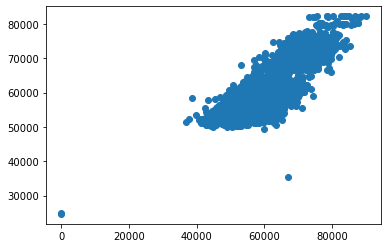

In [83]:
plt.scatter(y_test,predictions)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3603.2446193605797
MSE: 20983310.95570101
RMSE: 4580.754409013979


In [87]:
R2 = r2_score(y_test,predictions)
R2

0.6912828877557865

In [88]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)